## Crypto Arbitrage

In [166]:
# Import the required libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

In [167]:
# Read bitstamp csv file and set 'Timestamp' as index
bitstamp = pd.read_csv(Path('Resources/bitstamp.csv'),
                       index_col='Timestamp',
                       parse_dates=True,
                       infer_datetime_format=True)

In [168]:
# Display and summarize date
display(bitstamp.describe())
display(bitstamp.head())

,Open,High,Low,BTC Volume,USD Volume,Weighted Price
count,129067.000000,129067.000000,129067.000000,129067.000000,1.290670e+05,129067.000000
mean,10459.993683,10472.970114,10446.214703,11.792878,1.177496e+05,10459.384448
std,2315.909269,2318.929342,2312.331601,21.799938,2.070551e+05,2315.723480
min,5945.950000,5975.060000,5920.720000,0.000039,3.333436e-01,5949.997212
25%,8613.985000,8621.655000,8604.440000,1.711874,1.773244e+04,8613.587020
50%,10145.300000,10156.410000,10131.740000,4.994095,5.188050e+04,10144.740411
75%,11444.455000,11453.990000,11431.970000,12.717950,1.313104e+05,11443.791560
max,17234.980000,17234.990000,17214.960000,580.646391,5.483271e+06,17227.810502


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


In [169]:
# Read coinbase csv file and set 'Timestamp' as index
coinbase = pd.read_csv(Path('Resources/coinbase.csv'),
                       index_col='Timestamp',
                       parse_dates=True,
                       infer_datetime_format=True)

In [171]:
# Display and summarize date
display(coinbase.describe())
display(coinbase.head())

,Open,High,Low,BTC Volume,USD Volume,Weighted Price
count,129322.000000,129322.000000,129322.000000,129322.000000,1.293220e+05,129322.000000
mean,10449.213185,10456.118514,10441.872248,15.666556,1.572565e+05,10448.964130
std,2317.194653,2317.710389,2316.570594,27.481647,2.667879e+05,2317.167139
min,5882.300000,5907.280000,5873.000000,0.000442,6.699174e+00,5883.394912
25%,8609.230000,8613.872500,8603.505000,2.999125,3.071222e+04,8609.135020
50%,10137.440000,10145.900000,10127.880000,7.092572,7.461366e+04,10136.035004
75%,11397.522500,11400.000000,11390.000000,16.954279,1.754530e+05,11396.970843
max,17178.000000,17178.000000,17177.990000,959.084903,1.152334e+07,17177.995495


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

In [172]:
# Check the number of empty rows
bitstamp.isnull().sum()

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [175]:
# Remove empty entries from bitstamp dataframe
bitstamp = bitstamp.dropna()

In [176]:
# Remove $ signs
bitstamp['Close'] = bitstamp['Close'].str.replace("$", "")

C:\Users\magey\AppData\Local\Temp\ipykernel_6044\1082173949.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bitstamp['Close'] = bitstamp['Close'].str.replace("$", "")


In [177]:
# Convert the Close data type to a float
bitstamp['Close'] = bitstamp['Close'].astype('float')

In [178]:
# Review the data for duplicate values
bitstamp.duplicated().sum()

0

In [179]:
# Check the number of empty rows
coinbase.isnull().sum()

Open              218
High              218
Low               218
Close               0
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64

In [180]:
# Remove empty entries from coinbase dataframe, Remove $ signs, Convert the Close data type to a float, Review the data for duplicate values, Check the number of empty rows
coinbase = coinbase.dropna()
coinbase['Close'] = coinbase['Close'].str.replace("$", "")
coinbase['Close'] = coinbase['Close'].astype('float')
coinbase.duplicated().sum()

C:\Users\magey\AppData\Local\Temp\ipykernel_6044\735024692.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coinbase['Close'] = coinbase['Close'].str.replace("$", "")


0

## Analyze the Data

In [181]:
# Select `Timestamp (the index)` and `Close` from bitstamp dataFrame and assign to new dataframe
bitstamp_sliced = bitstamp.loc[:,['Close']]
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [182]:
# Select `Timestamp (the index)` and `Close` from coinbase DataFrame and assign to new dataframe
coinbase_sliced = coinbase.loc[:,['Close']]
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


In [183]:
# Summary statistics for the bitstamp dataFrame
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [184]:
# Summary statistics for the coinbase dataFrame
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Bitstamp Price'}, xlabel='Timestamp'>

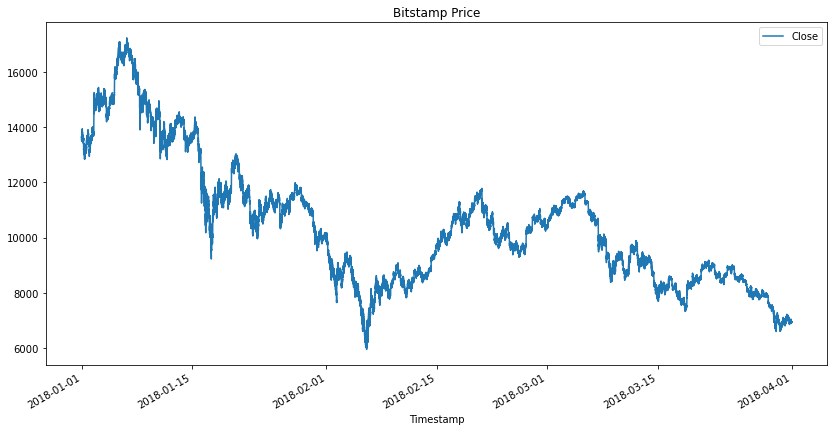

In [185]:
# Plot bitstamp dataframe
bitstamp_sliced.plot(figsize=(14,7),title='Bitstamp Price')

<AxesSubplot:title={'center':'Coinbase Price'}, xlabel='Timestamp'>

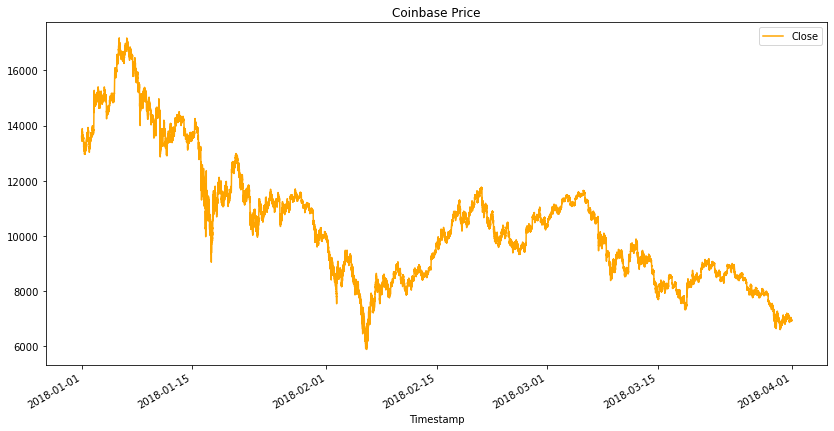

In [186]:
# Plot coinbase dataframe
coinbase_sliced.plot(figsize=(14,7),title='Coinbase Price',color='orange')

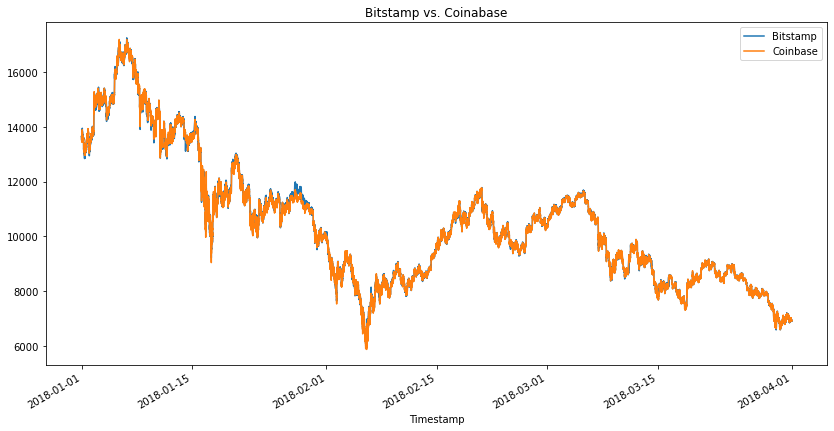

In [187]:
# Plot both dataframes together
ax = bitstamp_sliced.plot(figsize=(14,7),title='Bitstamp vs. Coinabase')
coinbase_sliced.plot(ax=ax)
ax.legend(['Bitstamp','Coinbase'])

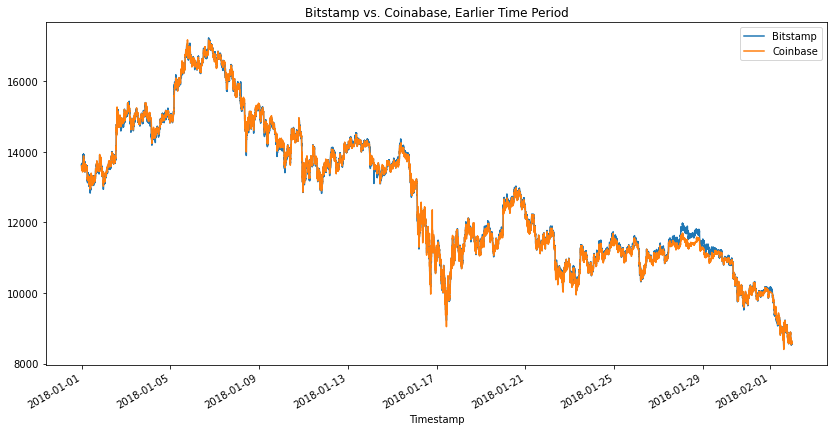

In [188]:
# Plot of earlier time period
ax = bitstamp_sliced.loc['2018-01-01':'2018-02-01'].plot(figsize=(14,7),title='Bitstamp vs. Coinabase, Earlier Time Period')
coinbase_sliced.loc['2018-01-01':'2018-02-01'].plot(ax=ax)
ax.legend(['Bitstamp','Coinbase'])

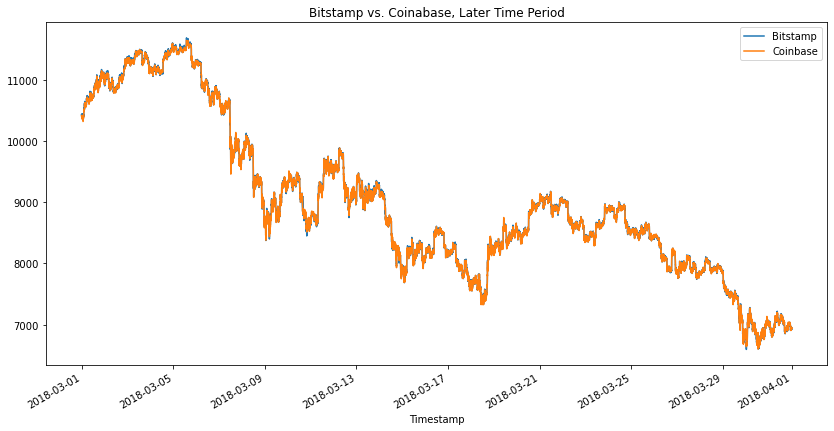

In [189]:
# Plot of later time period
ax = bitstamp_sliced.loc['2018-03-01':'2018-04-01'].plot(figsize=(14,7),title='Bitstamp vs. Coinabase, Later Time Period')
coinbase_sliced.loc['2018-03-01':'2018-04-01'].plot(ax=ax)
ax.legend(['Bitstamp','Coinbase'])

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** The degree of spread has reduced as time progressed.

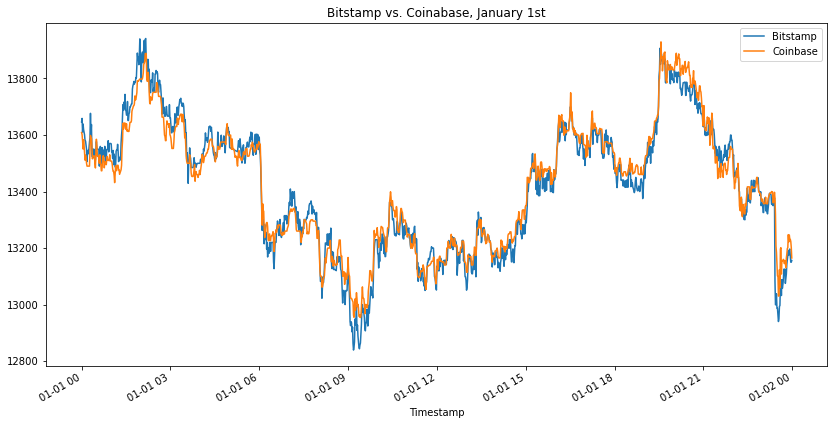

In [190]:
# Overlay plot for Jan 1st
ax = bitstamp_sliced.loc['2018-01-01'].plot(figsize=(14,7),title='Bitstamp vs. Coinabase, January 1st')
coinbase_sliced.loc['2018-01-01'].plot(ax=ax)
ax.legend(['Bitstamp','Coinbase'])

In [191]:
# Calculate and summarize arbitrage spread for Jan 1st
arbitrage_spread_early = coinbase_sliced.loc['2018-01-01'] - bitstamp_sliced.loc['2018-01-01']
arbitrage_spread_early.describe()

,Close
count,1421.000000
mean,5.767368
std,46.214511
min,-142.000000
25%,-26.890000
50%,5.480000
75%,36.000000
max,319.990000


<AxesSubplot:>

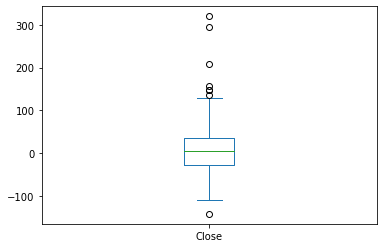

In [192]:
# Box plot of Jan 1st arbitrage spread
arbitrage_spread_early.plot.box()

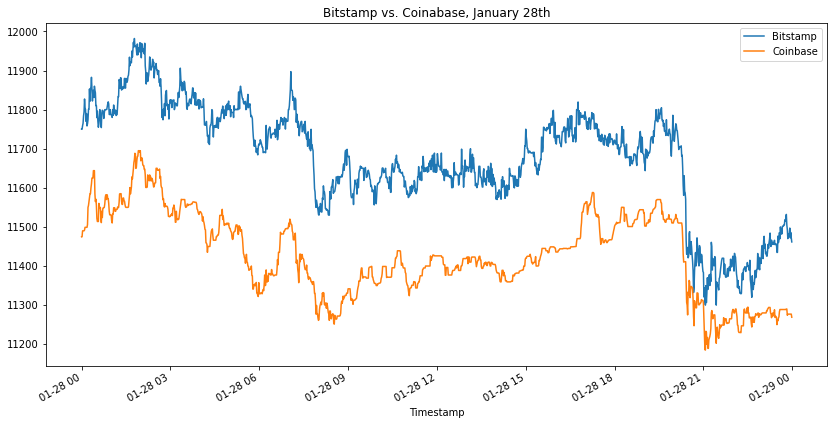

In [193]:
# Overlay plot for Jan 28th
ax = bitstamp_sliced.loc['2018-01-28'].plot(figsize=(14,7),title='Bitstamp vs. Coinabase, January 28th')
coinbase_sliced.loc['2018-01-28'].plot(ax=ax)
ax.legend(['Bitstamp','Coinbase'])

In [194]:
# Calculate and summarize arbitrage spread for Jan 28th
arbitrage_spread_middle = bitstamp_sliced.loc['2018-01-28'] - coinbase_sliced.loc['2018-01-28']
arbitrage_spread_middle.describe()

,Close
count,1436.000000
mean,247.552326
std,68.343472
min,55.030000
25%,210.022500
50%,251.180000
75%,290.925000
max,439.010000


<AxesSubplot:>

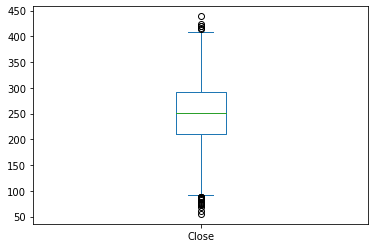

In [195]:
# Box plot of Jan 28th arbitrage spread
arbitrage_spread_middle.plot.box()

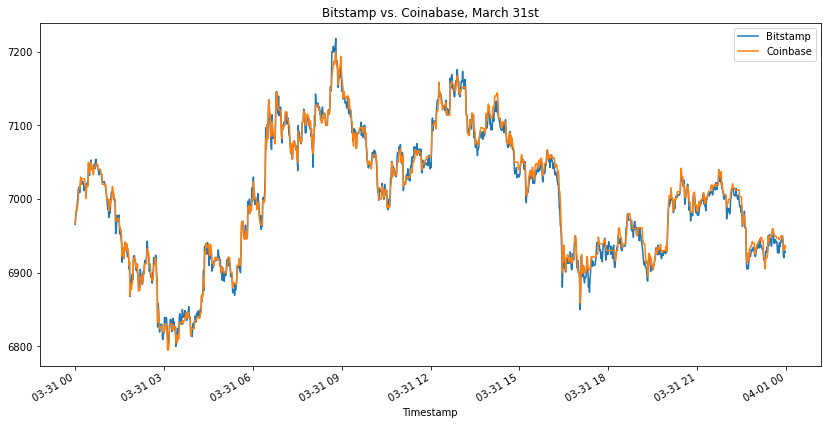

In [196]:
# Overlay plot for Mar 31st
ax = bitstamp_sliced.loc['2018-03-31'].plot(figsize=(14,7),title='Bitstamp vs. Coinabase, March 31st')
coinbase_sliced.loc['2018-03-31'].plot(ax=ax)
ax.legend(['Bitstamp','Coinbase'])

In [197]:
# Calculate and summarize arbitrage spread for Mar 31st
arbitrage_spread_late = coinbase_sliced.loc['2018-03-31'] - bitstamp_sliced.loc['2018-03-31']
arbitrage_spread_late.describe()

,Close
count,1434.000000
mean,2.348675
std,8.109623
min,-35.000000
25%,-2.537500
50%,2.300000
75%,7.627500
max,35.980000


<AxesSubplot:>

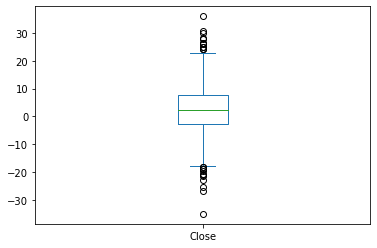

In [198]:
# Box plot of Mar 31st arbitrage spread
arbitrage_spread_late.plot.box()

In [199]:
# Arbitrage spread calculations and summarization of each day
arbitrage_spread_early = coinbase_sliced.loc['2018-01-01'] - bitstamp_sliced.loc['2018-01-01']
arbitrage_spread_middle = bitstamp_sliced.loc['2018-01-28'] - coinbase_sliced.loc['2018-01-28']
arbitrage_spread_late = coinbase_sliced.loc['2018-03-31'] - bitstamp_sliced.loc['2018-03-31']
display(arbitrage_spread_early.describe())
display(arbitrage_spread_middle.describe())
display(arbitrage_spread_late.describe())

,Close
count,1421.000000
mean,5.767368
std,46.214511
min,-142.000000
25%,-26.890000
50%,5.480000
75%,36.000000
max,319.990000


,Close
count,1436.000000
mean,247.552326
std,68.343472
min,55.030000
25%,210.022500
50%,251.180000
75%,290.925000
max,439.010000


,Close
count,1434.000000
mean,2.348675
std,8.109623
min,-35.000000
25%,-2.537500
50%,2.300000
75%,7.627500
max,35.980000


In [200]:
# Calulcation and summarization of selected day's spread return %
spread_return_early= arbitrage_spread_early[arbitrage_spread_early>0] / bitstamp_sliced.loc['2018-01-01']
spread_return_middle= arbitrage_spread_middle[arbitrage_spread_middle>0] / coinbase_sliced.loc['2018-01-28']
spread_return_late= arbitrage_spread_late[arbitrage_spread_late>0] / bitstamp_sliced.loc['2018-03-31']
display(spread_return_early.describe())
display(spread_return_middle.describe())
display(spread_return_late.describe())

,Close
count,7.820000e+02
mean,2.909132e-03
std,2.400203e-03
min,7.246377e-07
25%,1.187666e-03
50%,2.460052e-03
75%,4.021934e-03
max,2.461649e-02


,Close
count,1436.000000
mean,0.021648
std,0.005961
min,0.004885
25%,0.018369
50%,0.021897
75%,0.025292
max,0.038510


,Close
count,913.000000
mean,0.001003
std,0.000780
min,0.000001
25%,0.000383
50%,0.000864
75%,0.001434
max,0.005167


In [206]:
# Filtering profitable trades (>1%) for each day
profitable_trades_early = spread_return_early[spread_return_early>0.01]
profitable_trades_middle = spread_return_middle[spread_return_middle>0.01]
profitable_trades_late = spread_return_late[spread_return_late>0.01]
display(profitable_trades_early.head())
display(profitable_trades_middle.head())
display(profitable_trades_late.head())

,Close
Timestamp,
2018-01-01 00:00:00,NaN
2018-01-01 00:01:00,NaN
2018-01-01 00:02:00,NaN
2018-01-01 00:03:00,NaN
2018-01-01 00:04:00,NaN


,Close
Timestamp,
2018-01-28 00:00:00,0.023999
2018-01-28 00:01:00,0.023965
2018-01-28 00:02:00,0.023392
2018-01-28 00:03:00,0.023936
2018-01-28 00:04:00,0.025610


,Close
Timestamp,
2018-03-31 00:00:00,NaN
2018-03-31 00:01:00,NaN
2018-03-31 00:02:00,NaN
2018-03-31 00:03:00,NaN
2018-03-31 00:04:00,NaN


In [207]:
# Statitics of each day's trades that were profiting over a 1% return
display(profitable_trades_early.describe())
display(profitable_trades_middle.describe())
display(profitable_trades_late.describe())

,Close
count,7.000000
mean,0.015453
std,0.005833
min,0.010427
25%,0.011358
50%,0.012001
75%,0.019207
max,0.024616


,Close
count,1378.000000
mean,0.022201
std,0.005421
min,0.010087
25%,0.019016
50%,0.022191
75%,0.025413
max,0.038510


,Close
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [208]:
# Calculating potential profits in $ for each trade
profit_early = profitable_trades_early * bitstamp_sliced.loc['2018-01-01']
profit_middle = profitable_trades_middle * coinbase_sliced.loc['2018-01-28']
profit_late = profitable_trades_late * bitstamp_sliced.loc['2018-03-31']
# Cleaning dataframe
profit_per_trade_early = profit_early.dropna()
profit_per_trade_middle = profit_middle.dropna()
profit_per_trade_late = profit_late.dropna()
# Viewing profits per trade
display(profit_per_trade_early)
display(profit_per_trade_middle)
display(profit_per_trade_late)

,Close
Timestamp,
2018-01-01 09:10:00,147.33
2018-01-01 23:25:00,293.89
2018-01-01 23:26:00,319.99
2018-01-01 23:27:00,207.33
2018-01-01 23:28:00,146.82
2018-01-01 23:29:00,155.86
2018-01-01 23:31:00,135.18


,Close
Timestamp,
2018-01-28 00:00:00,275.38
2018-01-28 00:01:00,275.00
2018-01-28 00:02:00,268.77
2018-01-28 00:03:00,275.03
2018-01-28 00:04:00,294.26
...,...
2018-01-28 23:55:00,220.10
2018-01-28 23:56:00,195.11
2018-01-28 23:57:00,208.74


,Close
Timestamp,


In [209]:
# Generating statistics for each day's trades
display(profit_per_trade_early.describe())
display(profit_per_trade_middle.describe())
display(profit_per_trade_late.describe())

,Close
count,7.000000
mean,200.914286
std,76.390469
min,135.180000
25%,147.075000
50%,155.860000
75%,250.610000
max,319.990000


,Close
count,1378.000000
mean,253.931996
std,62.057953
min,113.970000
25%,217.272500
50%,254.150000
75%,292.987500
max,439.010000


,Close
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


<AxesSubplot:title={'center':'Profit per Trade: Jan 1st'}, xlabel='Timestamp'>

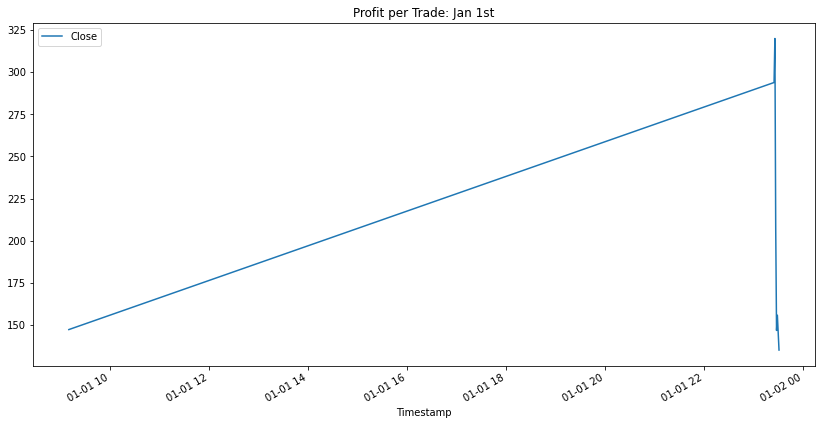

In [210]:
# Ploting profit per trade for Jan 1st
profit_per_trade_early.plot(figsize=(14,7), title='Profit per Trade: Jan 1st')

<AxesSubplot:title={'center':'Profit per Trade: Jan 28th'}, xlabel='Timestamp'>

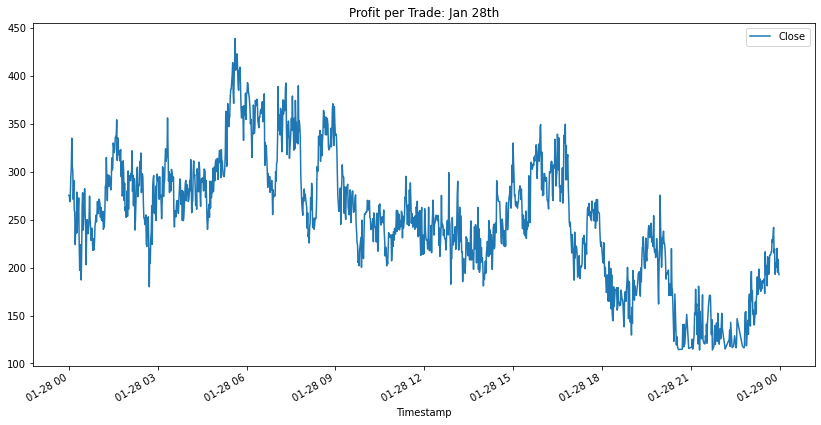

In [211]:
# Ploting profit per trade for Jan 28th
profit_per_trade_middle.plot(figsize=(14,7), title='Profit per Trade: Jan 28th')

<AxesSubplot:title={'center':'Profit per Trade: Mar 31st'}, xlabel='Timestamp'>

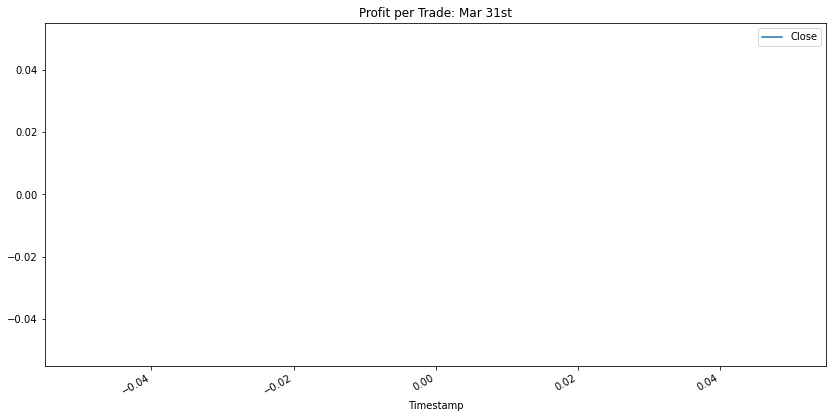

In [212]:
# Ploting profit per trade for Mar 31st
profit_per_trade_late.plot(figsize=(14,7), title='Profit per Trade: Mar 31st')

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [216]:
# Sum of profits for each day
sum_profit_early = profit_per_trade_early.sum()
sum_profit_middle = profit_per_trade_middle.sum()
sum_profit_late = profit_per_trade_late.sum()
display(sum_profit_early, sum_profit_middle, sum_profit_late)

Close    1406.4
dtype: float64

Close    349918.29
dtype: float64

Close    0.0
dtype: float64

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [222]:
# Calculating cumulative sum of profits for each day
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_middle = profit_per_trade_middle.cumsum()
cumulative_profit_late = profit_per_trade_late.cumsum()
display(cumulative_profit_early.describe)
display(cumulative_profit_middle.describe)
display(cumulative_profit_late.describe)

<bound method NDFrame.describe of                        Close
Timestamp                   
2018-01-01 09:10:00   147.33
2018-01-01 23:25:00   441.22
2018-01-01 23:26:00   761.21
2018-01-01 23:27:00   968.54
2018-01-01 23:28:00  1115.36
2018-01-01 23:29:00  1271.22
2018-01-01 23:31:00  1406.40>

<bound method NDFrame.describe of                          Close
Timestamp                     
2018-01-28 00:00:00     275.38
2018-01-28 00:01:00     550.38
2018-01-28 00:02:00     819.15
2018-01-28 00:03:00    1094.18
2018-01-28 00:04:00    1388.44
...                        ...
2018-01-28 23:55:00  349126.69
2018-01-28 23:56:00  349321.80
2018-01-28 23:57:00  349530.54
2018-01-28 23:58:00  349725.66
2018-01-28 23:59:00  349918.29

[1378 rows x 1 columns]>

<bound method NDFrame.describe of Empty DataFrame
Columns: [Close]
Index: []>

<AxesSubplot:title={'center':'Cumulative Profit Jan 1st'}, xlabel='Timestamp'>

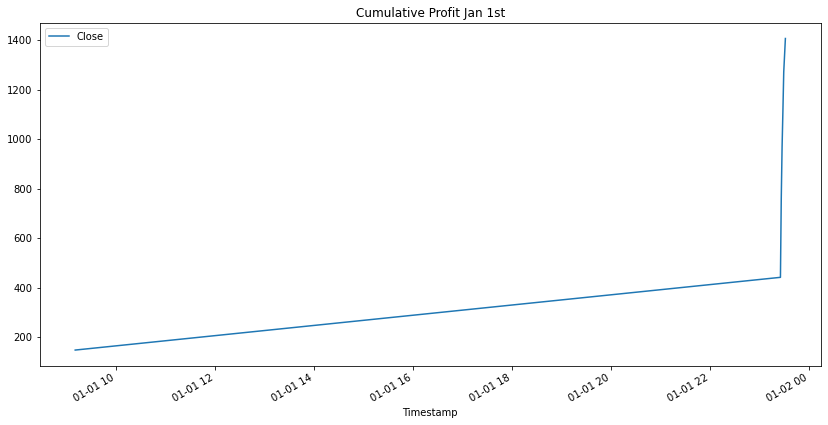

In [219]:
# Ploting cumulative profit for Jan 1st
cumulative_profit_early.plot(figsize=(14,7), title='Cumulative Profit Jan 1st')

<AxesSubplot:title={'center':'Cumulative Profit Jan 28th'}, xlabel='Timestamp'>

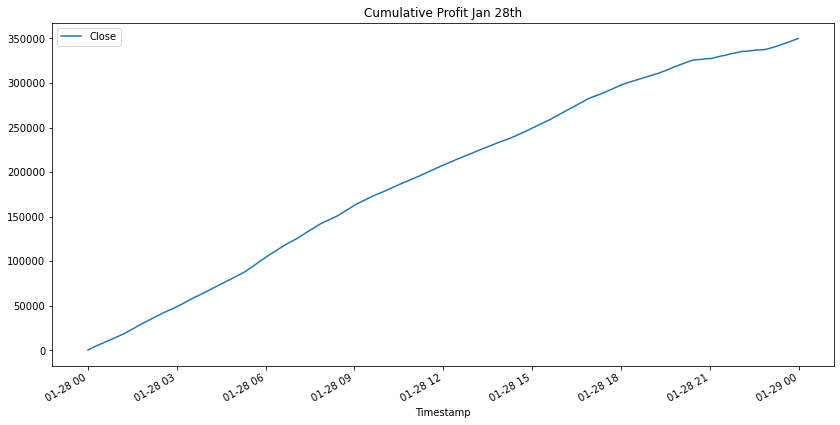

In [220]:
# Ploting cumulative profit for Jan 28th
cumulative_profit_middle.plot(figsize=(14,7), title='Cumulative Profit Jan 28th')

<AxesSubplot:title={'center':'Cumulative Profit Mar 31st'}, xlabel='Timestamp'>

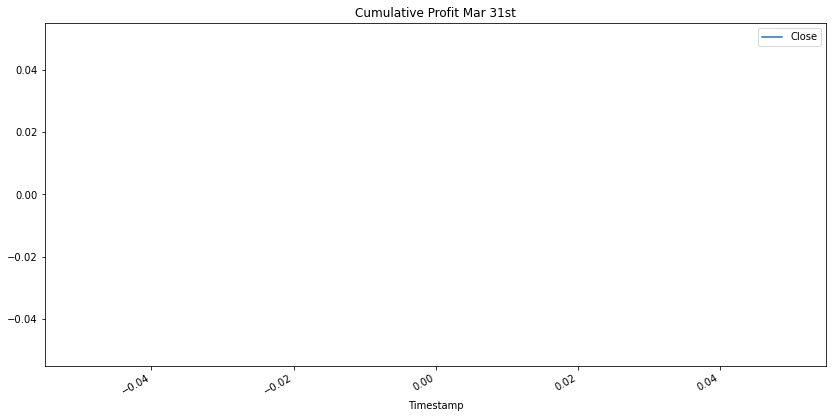

In [221]:
# Ploting cumulative profit for Mar 31st
cumulative_profit_late.plot(figsize=(14,7), title='Cumulative Profit Mar 31st')

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** Based off the dates I have chosen to analyze, it can be seen that arbitrage profits can vary widely from day to day. As you can see for March 31st 2018, there was actually 0 profit to be made; while January 28th 2018 had a proft of almost $350k
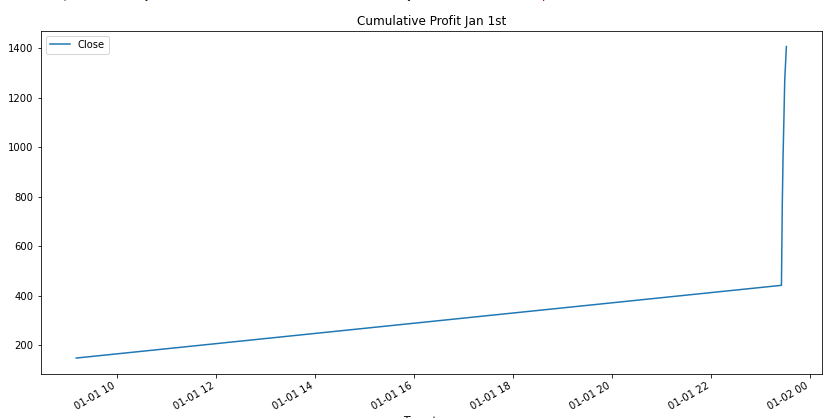 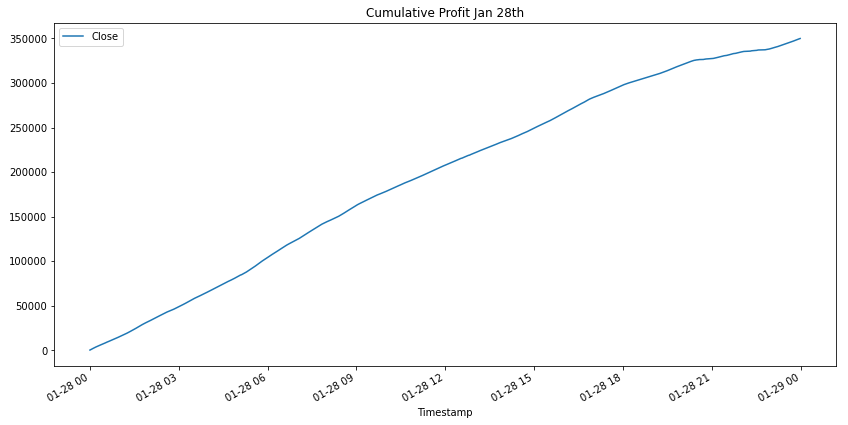 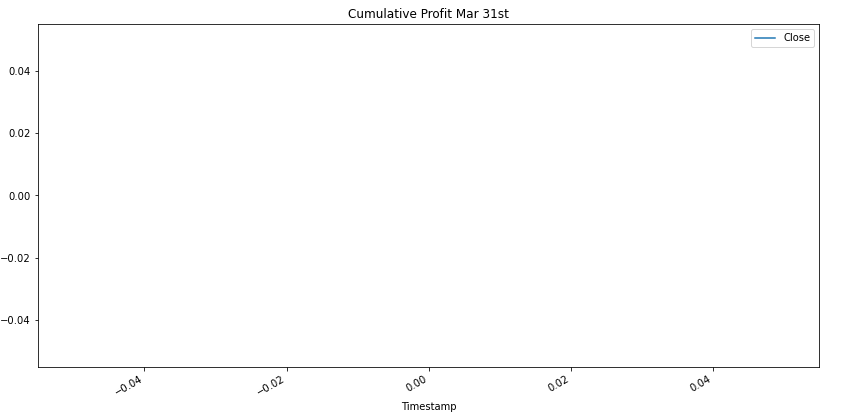 

If you were to take a step back and look at things on a larger scale, you can see that arbitrage margins began to reduce over time. This is due to more users trying to arbitrage trade which eventually causes the 2 exchanges to reach an equilibrium as buying lower prices causes the price to rise and selling higher prices causes the price to lowere.
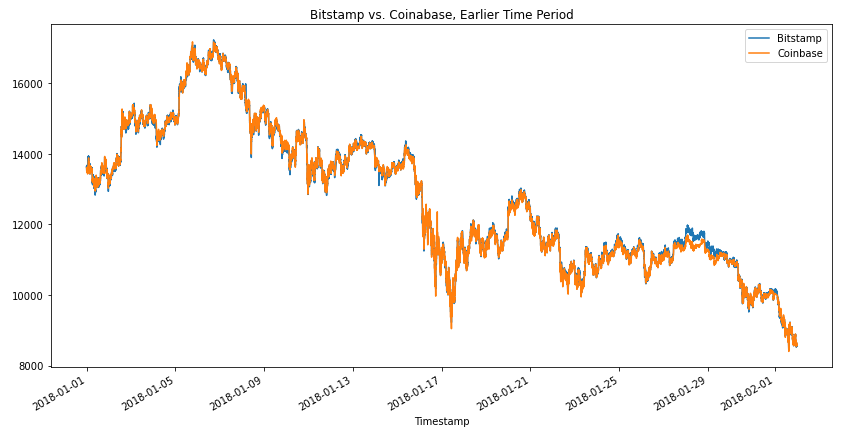 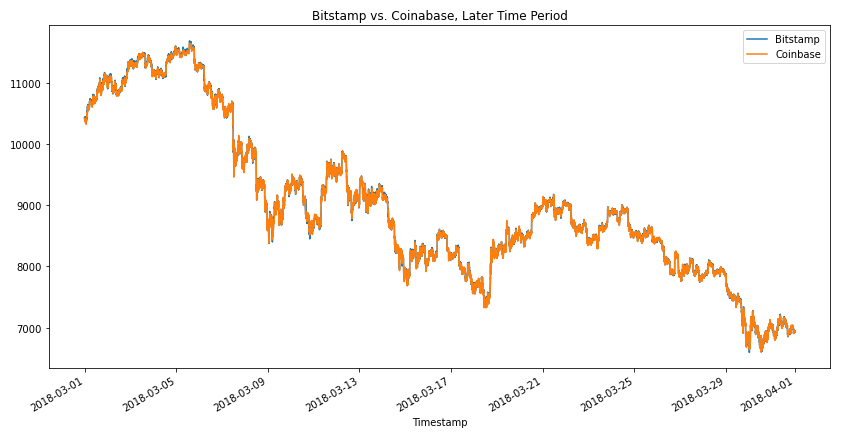